# Butadien II
We will invetigate various Butadien configurations and train a network on it. The data will be solely pyscf generated this time.

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

dim = 26

## Creating the dataset

In [2]:
from os import listdir
from os.path import join

from SCFInitialGuess.utilities import Molecule

def grep_molecule(input_file):
    import re
    
    with open(input_file) as f:
            
        molecule = re.search(r"\$molecule.*\$end", f.read(), re.DOTALL)
        if molecule is None:
            raise ValueError("No molecule found in " + f.name)
        else:
            molecule = molecule.group(0)

            # cut out geometries
            geometries = molecule.splitlines()[2:-1]

    # from geometries take the species and positions
    species, positions = [], []
    for line in geometries:
        splits = line.split()
        species.append(splits[0])
        positions.append(splits[1:])

    return species, positions

def fetch_molecules(folder):
    
    files = [file for file in listdir(folder) if ".inp" in file]
    
    for i, file in enumerate(files):
        
        print("Fetching: " + str(i + 1) + "/" + str(len(files)))

        mol = Molecule(*grep_molecule(join(folder, file)))
        
        mol.basis = "sto-3g"
        
        yield mol
        
        
molecules = list(fetch_molecules("butadien/data"))

Fetching: 1/200
Fetching: 2/200
Fetching: 3/200
Fetching: 4/200
Fetching: 5/200
Fetching: 6/200
Fetching: 7/200
Fetching: 8/200
Fetching: 9/200
Fetching: 10/200
Fetching: 11/200
Fetching: 12/200
Fetching: 13/200
Fetching: 14/200
Fetching: 15/200
Fetching: 16/200
Fetching: 17/200
Fetching: 18/200
Fetching: 19/200
Fetching: 20/200
Fetching: 21/200
Fetching: 22/200
Fetching: 23/200
Fetching: 24/200
Fetching: 25/200
Fetching: 26/200
Fetching: 27/200
Fetching: 28/200
Fetching: 29/200
Fetching: 30/200
Fetching: 31/200
Fetching: 32/200
Fetching: 33/200
Fetching: 34/200
Fetching: 35/200
Fetching: 36/200
Fetching: 37/200
Fetching: 38/200
Fetching: 39/200
Fetching: 40/200
Fetching: 41/200
Fetching: 42/200
Fetching: 43/200
Fetching: 44/200
Fetching: 45/200
Fetching: 46/200
Fetching: 47/200
Fetching: 48/200
Fetching: 49/200
Fetching: 50/200
Fetching: 51/200
Fetching: 52/200
Fetching: 53/200
Fetching: 54/200
Fetching: 55/200
Fetching: 56/200
Fetching: 57/200
Fetching: 58/200
Fetching: 59/200
Fetchi

In [4]:
from pyscf.scf import hf

S, P = [], []
for i, molecule in enumerate(molecules):
    
    print(str(i + 1) + "/" + str(len(molecules)))
    
    mol = molecule.get_pyscf_molecule()
    mf = hf.RHF(mol)
    mf.verbose = 1
    mf.run()
    
    S.append(mf.get_ovlp().reshape((dim**2, )))
    P.append(mf.make_rdm1().reshape((dim**2, )))
    
    


1/200


Warn: Ipython shell catchs sys.args


2/200


Warn: Ipython shell catchs sys.args


3/200


Warn: Ipython shell catchs sys.args


4/200


Warn: Ipython shell catchs sys.args


5/200


Warn: Ipython shell catchs sys.args


6/200


Warn: Ipython shell catchs sys.args


7/200


Warn: Ipython shell catchs sys.args


8/200


Warn: Ipython shell catchs sys.args


9/200


Warn: Ipython shell catchs sys.args


10/200


Warn: Ipython shell catchs sys.args


11/200


Warn: Ipython shell catchs sys.args


12/200


Warn: Ipython shell catchs sys.args


13/200


Warn: Ipython shell catchs sys.args


14/200


Warn: Ipython shell catchs sys.args


15/200


Warn: Ipython shell catchs sys.args


16/200


Warn: Ipython shell catchs sys.args


17/200


Warn: Ipython shell catchs sys.args


18/200


Warn: Ipython shell catchs sys.args


19/200


Warn: Ipython shell catchs sys.args


20/200


Warn: Ipython shell catchs sys.args


21/200


Warn: Ipython shell catchs sys.args


22/200


Warn: Ipython shell catchs sys.args


23/200


Warn: Ipython shell catchs sys.args


24/200


Warn: Ipython shell catchs sys.args


25/200


Warn: Ipython shell catchs sys.args


26/200


Warn: Ipython shell catchs sys.args


27/200


Warn: Ipython shell catchs sys.args


28/200


Warn: Ipython shell catchs sys.args


29/200


Warn: Ipython shell catchs sys.args


30/200


Warn: Ipython shell catchs sys.args


31/200


Warn: Ipython shell catchs sys.args


32/200


Warn: Ipython shell catchs sys.args


33/200


Warn: Ipython shell catchs sys.args


34/200


Warn: Ipython shell catchs sys.args


35/200


Warn: Ipython shell catchs sys.args


36/200


Warn: Ipython shell catchs sys.args


37/200


Warn: Ipython shell catchs sys.args


38/200


Warn: Ipython shell catchs sys.args


39/200


Warn: Ipython shell catchs sys.args


40/200


Warn: Ipython shell catchs sys.args


41/200


Warn: Ipython shell catchs sys.args


42/200


Warn: Ipython shell catchs sys.args


43/200


Warn: Ipython shell catchs sys.args


44/200


Warn: Ipython shell catchs sys.args


45/200


Warn: Ipython shell catchs sys.args


46/200


Warn: Ipython shell catchs sys.args


47/200


Warn: Ipython shell catchs sys.args


48/200


Warn: Ipython shell catchs sys.args


49/200


Warn: Ipython shell catchs sys.args


50/200


Warn: Ipython shell catchs sys.args


51/200


Warn: Ipython shell catchs sys.args


52/200


Warn: Ipython shell catchs sys.args


53/200


Warn: Ipython shell catchs sys.args


54/200


Warn: Ipython shell catchs sys.args


55/200


Warn: Ipython shell catchs sys.args


56/200


Warn: Ipython shell catchs sys.args


57/200


Warn: Ipython shell catchs sys.args


58/200


Warn: Ipython shell catchs sys.args


59/200


Warn: Ipython shell catchs sys.args


60/200


Warn: Ipython shell catchs sys.args


61/200


Warn: Ipython shell catchs sys.args


62/200


Warn: Ipython shell catchs sys.args


63/200


Warn: Ipython shell catchs sys.args


64/200


Warn: Ipython shell catchs sys.args


65/200


Warn: Ipython shell catchs sys.args


66/200


Warn: Ipython shell catchs sys.args


67/200


Warn: Ipython shell catchs sys.args


68/200


Warn: Ipython shell catchs sys.args


69/200


Warn: Ipython shell catchs sys.args


70/200


Warn: Ipython shell catchs sys.args


71/200


Warn: Ipython shell catchs sys.args


72/200


Warn: Ipython shell catchs sys.args


73/200


Warn: Ipython shell catchs sys.args


74/200


Warn: Ipython shell catchs sys.args


75/200


Warn: Ipython shell catchs sys.args


76/200


Warn: Ipython shell catchs sys.args


77/200


Warn: Ipython shell catchs sys.args


78/200


Warn: Ipython shell catchs sys.args


79/200


Warn: Ipython shell catchs sys.args


80/200


Warn: Ipython shell catchs sys.args


81/200


Warn: Ipython shell catchs sys.args


82/200


Warn: Ipython shell catchs sys.args


83/200


Warn: Ipython shell catchs sys.args


84/200


Warn: Ipython shell catchs sys.args


85/200


Warn: Ipython shell catchs sys.args


86/200


Warn: Ipython shell catchs sys.args


87/200


Warn: Ipython shell catchs sys.args


88/200


Warn: Ipython shell catchs sys.args


89/200


Warn: Ipython shell catchs sys.args


90/200


Warn: Ipython shell catchs sys.args


91/200


Warn: Ipython shell catchs sys.args


92/200


Warn: Ipython shell catchs sys.args


93/200


Warn: Ipython shell catchs sys.args


94/200


Warn: Ipython shell catchs sys.args


95/200


Warn: Ipython shell catchs sys.args


96/200


Warn: Ipython shell catchs sys.args


97/200


Warn: Ipython shell catchs sys.args


98/200


Warn: Ipython shell catchs sys.args


99/200


Warn: Ipython shell catchs sys.args


100/200


Warn: Ipython shell catchs sys.args


101/200


Warn: Ipython shell catchs sys.args


102/200


Warn: Ipython shell catchs sys.args


103/200


Warn: Ipython shell catchs sys.args


104/200


Warn: Ipython shell catchs sys.args


105/200


Warn: Ipython shell catchs sys.args


106/200


Warn: Ipython shell catchs sys.args


107/200


Warn: Ipython shell catchs sys.args


108/200


Warn: Ipython shell catchs sys.args


109/200


Warn: Ipython shell catchs sys.args


110/200


Warn: Ipython shell catchs sys.args


111/200


Warn: Ipython shell catchs sys.args


112/200


Warn: Ipython shell catchs sys.args


113/200


Warn: Ipython shell catchs sys.args


114/200


Warn: Ipython shell catchs sys.args


115/200


Warn: Ipython shell catchs sys.args


116/200


Warn: Ipython shell catchs sys.args


117/200


Warn: Ipython shell catchs sys.args


118/200


Warn: Ipython shell catchs sys.args


119/200


Warn: Ipython shell catchs sys.args


120/200


Warn: Ipython shell catchs sys.args


121/200


Warn: Ipython shell catchs sys.args


122/200


Warn: Ipython shell catchs sys.args


123/200


Warn: Ipython shell catchs sys.args


124/200


Warn: Ipython shell catchs sys.args


125/200


Warn: Ipython shell catchs sys.args


126/200


Warn: Ipython shell catchs sys.args


127/200


Warn: Ipython shell catchs sys.args


128/200


Warn: Ipython shell catchs sys.args


129/200


Warn: Ipython shell catchs sys.args


130/200


Warn: Ipython shell catchs sys.args


131/200


Warn: Ipython shell catchs sys.args


132/200


Warn: Ipython shell catchs sys.args


133/200


Warn: Ipython shell catchs sys.args


134/200


Warn: Ipython shell catchs sys.args


135/200


Warn: Ipython shell catchs sys.args


136/200


Warn: Ipython shell catchs sys.args


137/200


Warn: Ipython shell catchs sys.args


138/200


Warn: Ipython shell catchs sys.args


139/200


Warn: Ipython shell catchs sys.args


140/200


Warn: Ipython shell catchs sys.args


141/200


Warn: Ipython shell catchs sys.args


142/200


Warn: Ipython shell catchs sys.args


143/200


Warn: Ipython shell catchs sys.args


144/200


Warn: Ipython shell catchs sys.args


145/200


Warn: Ipython shell catchs sys.args


146/200


Warn: Ipython shell catchs sys.args


147/200


Warn: Ipython shell catchs sys.args


148/200


Warn: Ipython shell catchs sys.args


149/200


Warn: Ipython shell catchs sys.args


150/200


Warn: Ipython shell catchs sys.args


151/200


Warn: Ipython shell catchs sys.args


152/200


Warn: Ipython shell catchs sys.args


153/200


Warn: Ipython shell catchs sys.args


154/200


Warn: Ipython shell catchs sys.args


155/200


Warn: Ipython shell catchs sys.args


156/200


Warn: Ipython shell catchs sys.args


157/200


Warn: Ipython shell catchs sys.args


158/200


Warn: Ipython shell catchs sys.args


159/200


Warn: Ipython shell catchs sys.args


160/200


Warn: Ipython shell catchs sys.args


161/200


Warn: Ipython shell catchs sys.args


162/200


Warn: Ipython shell catchs sys.args


163/200


Warn: Ipython shell catchs sys.args


164/200


Warn: Ipython shell catchs sys.args


165/200


Warn: Ipython shell catchs sys.args


166/200


Warn: Ipython shell catchs sys.args


167/200


Warn: Ipython shell catchs sys.args


168/200


Warn: Ipython shell catchs sys.args


169/200


Warn: Ipython shell catchs sys.args


170/200


Warn: Ipython shell catchs sys.args


171/200


Warn: Ipython shell catchs sys.args


172/200


Warn: Ipython shell catchs sys.args


173/200


Warn: Ipython shell catchs sys.args


174/200


Warn: Ipython shell catchs sys.args


175/200


Warn: Ipython shell catchs sys.args


176/200


Warn: Ipython shell catchs sys.args


177/200


Warn: Ipython shell catchs sys.args


178/200


Warn: Ipython shell catchs sys.args


179/200


Warn: Ipython shell catchs sys.args


180/200


Warn: Ipython shell catchs sys.args


181/200


Warn: Ipython shell catchs sys.args


182/200


Warn: Ipython shell catchs sys.args


183/200


Warn: Ipython shell catchs sys.args


184/200


Warn: Ipython shell catchs sys.args


185/200


Warn: Ipython shell catchs sys.args


186/200


Warn: Ipython shell catchs sys.args


187/200


Warn: Ipython shell catchs sys.args


188/200


Warn: Ipython shell catchs sys.args


189/200


Warn: Ipython shell catchs sys.args


190/200


Warn: Ipython shell catchs sys.args


191/200


Warn: Ipython shell catchs sys.args


192/200


Warn: Ipython shell catchs sys.args


193/200


Warn: Ipython shell catchs sys.args


194/200


Warn: Ipython shell catchs sys.args


195/200


Warn: Ipython shell catchs sys.args


196/200


Warn: Ipython shell catchs sys.args


197/200


Warn: Ipython shell catchs sys.args


198/200


Warn: Ipython shell catchs sys.args


199/200


Warn: Ipython shell catchs sys.args


200/200


Warn: Ipython shell catchs sys.args


In [5]:
np.save("butadien/dataset.npy", (S,P))

In [6]:
from SCFInitialGuess.utilities.dataset import Dataset

ind_cut = 150
index = np.arange(200)
np.random.shuffle(index)

S_test = np.array(S)[index[150:]]
P_test = np.array(P)[index[150:]]
molecules_test = [molecules[index[i]] for i in range(150, 200)]

S_train = np.array(S)[index[:150]]
P_train = np.array(P)[index[:150]]
molecules_train = [molecules[index[i]] for i in range(150)]

dataset = Dataset(np.array(S_train), np.array(P_train), split_test=0.0)

dataset.testing = (Dataset.normalize(S_test, mean=dataset.x_mean, std=dataset.x_std)[0], P_test)

[-] 2018-03-19 18:12:42: Data set initialized. Mean value std: 0.008687105625914897


In [46]:
from SCFInitialGuess.nn.networks import EluTrNNN
from SCFInitialGuess.nn.training import train_network
from shutil import rmtree

structure = [dim**2, 200, 100, dim**2]
save_path = "log/orig/"

try:
    sess.close()
except:
    pass

tf.reset_default_graph()
try:
    rmtree(save_path)
except:
    print("could not delete")

network, sess = train_network(
    EluTrNNN(structure, log_histograms=True),
    dataset,
    evaluation_period=100,
    mini_batch_size=20,
    convergence_threshold=1e-7,
    regularisation_parameter=1e-6,
    summary_save_path=save_path
)


[-] 2018-03-19 18:36:58: Setting up the graph ...
[w] 2018-03-19 18:36:59: Careful! If more than 1 network is in current graph, it should be cleared before merging the summary!
[-] 2018-03-19 18:36:59: Starting network training ...
[ ] 2018-03-19 18:36:59: Validation cost: 5.78650E-02. Diff to prev.: 1.0E+10
[ ] 2018-03-19 18:36:59: Validation cost: 1.99319E-04. Diff to prev.: 5.8E-02
[ ] 2018-03-19 18:37:00: Validation cost: 7.16152E-05. Diff to prev.: 1.3E-04
[ ] 2018-03-19 18:37:00: Validation cost: 3.94537E-05. Diff to prev.: 3.2E-05
[ ] 2018-03-19 18:37:01: Validation cost: 2.33847E-05. Diff to prev.: 1.6E-05
[ ] 2018-03-19 18:37:02: Validation cost: 2.21197E-05. Diff to prev.: 1.3E-06
[ ] 2018-03-19 18:37:02: Validation cost: 5.06845E-05. Diff to prev.: 2.9E-05
[ ] 2018-03-19 18:37:03: Validation cost: 2.64398E-05. Diff to prev.: 2.4E-05
[ ] 2018-03-19 18:37:04: Validation cost: 2.83954E-05. Diff to prev.: 2.0E-06
[ ] 2018-03-19 18:37:04: Validation cost: 1.93793E-05. Diff to pre

## Analysis with test data


### Plot utilities

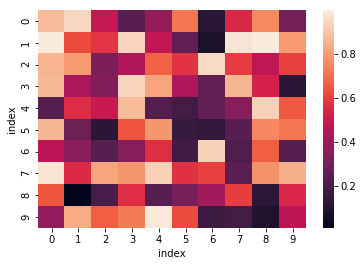

In [15]:
import seaborn as sns

cmap = plt.get_cmap('PuRd')# oder RdPu

def matrix_error(error, xlabel="index", ylabel="index", **kwargs):
    
    ax = sns.heatmap(error, **kwargs)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return ax
    
matrix_error(np.random.rand(10, 10))

plt.show()


### Scatter

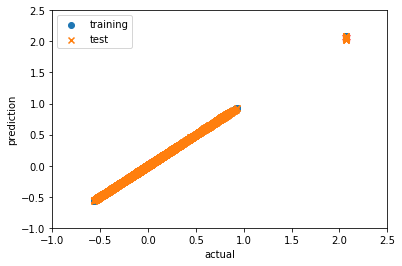

In [16]:
from functools import reduce


flatten = lambda x, y: list(x) + list(y)


#training
expected = reduce(flatten, dataset.training[1])
actual = reduce(flatten, 
    network.run(
        sess, 
        dataset.training[0]
    )
)

frac  = 1
index = np.arange(int(np.floor(frac * len(actual))))
np.random.shuffle(index)
plt.scatter(np.array(expected)[index], np.array(actual)[index], label="training")

# test dataset
expected = reduce(flatten, dataset.testing[1])
actual = reduce(flatten, 
    network.run(
        sess, 
        dataset.testing[0]
    )
)
plt.scatter(expected,actual, marker="x", label="test")

plt.legend()

lower, upper = -1, 2.5
plt.axis([lower, upper, lower, upper])
plt.ylabel("prediction")
plt.xlabel("actual")
plt.show()

### Accumulated test error matrix

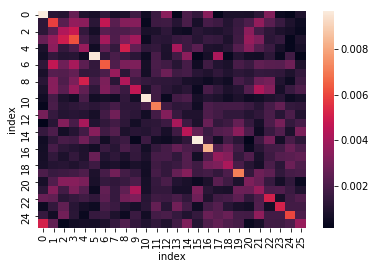

In [17]:
error = np.zeros((dim, dim))
for (x, y) in zip(*dataset.testing):
    x = x.reshape(1, dim**2)
    error += np.abs((y - network.run(sess, x)).reshape(dim, dim))
error /= len(dataset.testing[0])

matrix_error(error)
plt.show()

### Iterations

In [18]:
from pyscf.scf import hf

dim = 26

iterations = []
for i, (molecule, p) in enumerate(zip(molecules_test, P_test)):
    
    mol = molecule.get_pyscf_molecule()
    
    
    print("Calculating: " + str(i + 1) + "/" + str(len(molecules_test)))
    
    # assemble pyscf initial guesses
    P_1e = hf.init_guess_by_1e(mol)
    P_atom = hf.init_guess_by_atom(mol)
    P_minao = hf.init_guess_by_minao(mol)
    
    # nn guess
    s = hf.get_ovlp(mol).reshape(1, dim**2)
    s = Dataset.normalize(s, mean=dataset.x_mean, std=dataset.x_std)[0]
    P_NN = network.run(sess, s).reshape(dim, dim).astype('float64')
    
    # P_actual wi noise
    p_noise = p.reshape(dim, dim) + np.random.randn(dim, dim) * 1e-4
    
    
    iterations_molecule = []
    for guess in [P_1e, P_atom, P_minao, P_NN, p.reshape(dim, dim), p_noise]:
        
        mf = hf.RHF(mol)
        mf.verbose = 1
        mf.kernel(dm0=guess)
        iterations_molecule.append(mf.iterations)
    
    iterations.append(iterations_molecule)

iterations = np.array(iterations)

Warn: Ipython shell catchs sys.args


Calculating: 1/50
Calculating: 2/50


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


Calculating: 3/50


Warn: Ipython shell catchs sys.args


Calculating: 4/50


Warn: Ipython shell catchs sys.args


Calculating: 5/50


Warn: Ipython shell catchs sys.args


Calculating: 6/50


Warn: Ipython shell catchs sys.args


Calculating: 7/50


Warn: Ipython shell catchs sys.args


Calculating: 8/50


Warn: Ipython shell catchs sys.args


Calculating: 9/50


Warn: Ipython shell catchs sys.args


Calculating: 10/50


Warn: Ipython shell catchs sys.args


Calculating: 11/50


Warn: Ipython shell catchs sys.args


Calculating: 12/50


Warn: Ipython shell catchs sys.args


Calculating: 13/50


Warn: Ipython shell catchs sys.args


Calculating: 14/50


Warn: Ipython shell catchs sys.args


Calculating: 15/50
Calculating: 16/50


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


Calculating: 17/50


Warn: Ipython shell catchs sys.args


Calculating: 18/50


Warn: Ipython shell catchs sys.args


Calculating: 19/50


Warn: Ipython shell catchs sys.args


Calculating: 20/50


Warn: Ipython shell catchs sys.args


Calculating: 21/50


Warn: Ipython shell catchs sys.args


Calculating: 22/50


Warn: Ipython shell catchs sys.args


Calculating: 23/50


Warn: Ipython shell catchs sys.args


Calculating: 24/50


Warn: Ipython shell catchs sys.args


Calculating: 25/50


Warn: Ipython shell catchs sys.args


Calculating: 26/50


Warn: Ipython shell catchs sys.args


Calculating: 27/50


Warn: Ipython shell catchs sys.args


Calculating: 28/50


Warn: Ipython shell catchs sys.args


Calculating: 29/50


Warn: Ipython shell catchs sys.args


Calculating: 30/50


Warn: Ipython shell catchs sys.args


Calculating: 31/50


Warn: Ipython shell catchs sys.args


Calculating: 32/50


Warn: Ipython shell catchs sys.args


Calculating: 33/50


Warn: Ipython shell catchs sys.args


Calculating: 34/50


Warn: Ipython shell catchs sys.args


Calculating: 35/50


Warn: Ipython shell catchs sys.args


Calculating: 36/50


Warn: Ipython shell catchs sys.args


Calculating: 37/50


Warn: Ipython shell catchs sys.args


Calculating: 38/50


Warn: Ipython shell catchs sys.args


Calculating: 39/50


Warn: Ipython shell catchs sys.args


Calculating: 40/50


Warn: Ipython shell catchs sys.args


Calculating: 41/50


Warn: Ipython shell catchs sys.args


Calculating: 42/50


Warn: Ipython shell catchs sys.args


Calculating: 43/50


Warn: Ipython shell catchs sys.args


Calculating: 44/50


Warn: Ipython shell catchs sys.args


Calculating: 45/50


Warn: Ipython shell catchs sys.args


Calculating: 46/50


Warn: Ipython shell catchs sys.args


Calculating: 47/50


Warn: Ipython shell catchs sys.args


Calculating: 48/50


Warn: Ipython shell catchs sys.args


Calculating: 49/50


Warn: Ipython shell catchs sys.args


Calculating: 50/50


[ 12.86   8.78   8.98   7.78   1.     4.8 ]


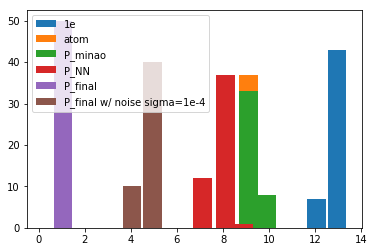

In [19]:
#fig, axes = plt.subplots(2,2)

print(np.mean(iterations,0))

bins = 20 # todo hier kann man auch ein array angeben

for i, name in enumerate(['1e', 'atom', 'P_minao', 'P_NN', 'P_final', "P_final w/ noise sigma=1e-4"]):
    
    hist, bins = np.histogram(iterations[:,i])
    center = (bins[:-1] + bins[1:]) / 2
    #axes[i].bar(center, hist, label=name)
    plt.bar(center, hist, label=name)
    
plt.legend()
plt.show()

### Comparing the others against the result
TODO: matrix plot von fehler der jeweiligen initial guesses

In [20]:
from pyscf.scf import hf

dim = 26


number_of_samples = len(S_test)

dP_1e, dP_atom, dP_minao, dP_NN = [np.zeros((dim, dim)) for i in range(4)]
P_1e, P_atom, P_minao, P_expected = [[] for i in range(4)]

for i, (molecule, s, p) in enumerate(zip(molecules_test, S_test, P_test)):
    
    mol = molecule.get_pyscf_molecule()
    
    print("Calculating: " + str(i + 1) + "/" + str(number_of_samples))
    
    # assemble pyscf initial guesses
    P_1e.append(hf.init_guess_by_1e(mol))
    P_atom.append(hf.init_guess_by_atom(mol))
    P_minao.append(hf.init_guess_by_minao(mol))
    
    p = p.reshape(dim, dim)
    P_expected.append(p)
    
    
    # nn guess
    s = Dataset.normalize(s.reshape(1, dim**2), mean=dataset.x_mean, std=dataset.x_std)[0]
    P_NN = network.run(sess, s).reshape(dim, dim).astype('float64')
    
    
    # calculate deltas
    dP_1e += np.abs(p - P_1e[-1])
    dP_atom += np.abs(p - P_atom[-1])
    dP_minao += np.abs(p - P_minao[-1])
    dP_NN += np.abs(p - P_NN)
    

    
dP_1e /= number_of_samples
dP_atom /= number_of_samples
dP_minao /= number_of_samples
dP_NN /= number_of_samples

Warn: Ipython shell catchs sys.args


Calculating: 1/50


Warn: Ipython shell catchs sys.args


Calculating: 2/50


Warn: Ipython shell catchs sys.args


Calculating: 3/50


Warn: Ipython shell catchs sys.args


Calculating: 4/50


Warn: Ipython shell catchs sys.args


Calculating: 5/50


Warn: Ipython shell catchs sys.args


Calculating: 6/50


Warn: Ipython shell catchs sys.args


Calculating: 7/50


Warn: Ipython shell catchs sys.args


Calculating: 8/50


Warn: Ipython shell catchs sys.args


Calculating: 9/50


Warn: Ipython shell catchs sys.args


Calculating: 10/50


Warn: Ipython shell catchs sys.args


Calculating: 11/50


Warn: Ipython shell catchs sys.args


Calculating: 12/50


Warn: Ipython shell catchs sys.args


Calculating: 13/50


Warn: Ipython shell catchs sys.args


Calculating: 14/50


Warn: Ipython shell catchs sys.args


Calculating: 15/50


Warn: Ipython shell catchs sys.args


Calculating: 16/50


Warn: Ipython shell catchs sys.args


Calculating: 17/50


Warn: Ipython shell catchs sys.args


Calculating: 18/50


Warn: Ipython shell catchs sys.args


Calculating: 19/50


Warn: Ipython shell catchs sys.args


Calculating: 20/50


Warn: Ipython shell catchs sys.args


Calculating: 21/50


Warn: Ipython shell catchs sys.args


Calculating: 22/50


Warn: Ipython shell catchs sys.args


Calculating: 23/50


Warn: Ipython shell catchs sys.args


Calculating: 24/50


Warn: Ipython shell catchs sys.args


Calculating: 25/50


Warn: Ipython shell catchs sys.args


Calculating: 26/50


Warn: Ipython shell catchs sys.args


Calculating: 27/50


Warn: Ipython shell catchs sys.args


Calculating: 28/50


Warn: Ipython shell catchs sys.args


Calculating: 29/50


Warn: Ipython shell catchs sys.args


Calculating: 30/50


Warn: Ipython shell catchs sys.args


Calculating: 31/50


Warn: Ipython shell catchs sys.args


Calculating: 32/50


Warn: Ipython shell catchs sys.args


Calculating: 33/50


Warn: Ipython shell catchs sys.args


Calculating: 34/50


Warn: Ipython shell catchs sys.args


Calculating: 35/50


Warn: Ipython shell catchs sys.args


Calculating: 36/50


Warn: Ipython shell catchs sys.args


Calculating: 37/50


Warn: Ipython shell catchs sys.args


Calculating: 38/50


Warn: Ipython shell catchs sys.args


Calculating: 39/50


Warn: Ipython shell catchs sys.args


Calculating: 40/50


Warn: Ipython shell catchs sys.args


Calculating: 41/50


Warn: Ipython shell catchs sys.args


Calculating: 42/50


Warn: Ipython shell catchs sys.args


Calculating: 43/50


Warn: Ipython shell catchs sys.args


Calculating: 44/50


Warn: Ipython shell catchs sys.args


Calculating: 45/50


Warn: Ipython shell catchs sys.args


Calculating: 46/50


Warn: Ipython shell catchs sys.args


Calculating: 47/50


Warn: Ipython shell catchs sys.args


Calculating: 48/50


Warn: Ipython shell catchs sys.args


Calculating: 49/50


Warn: Ipython shell catchs sys.args


Calculating: 50/50


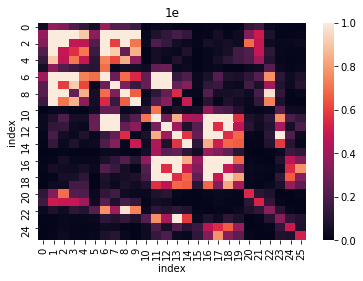

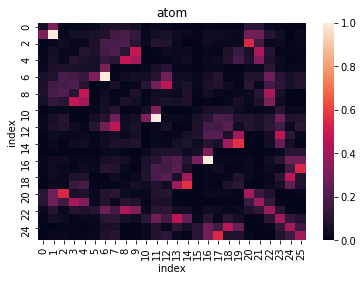

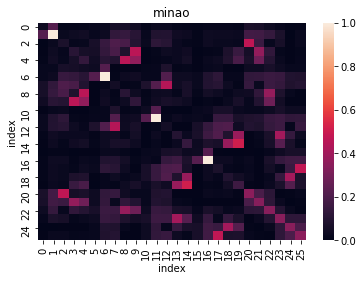

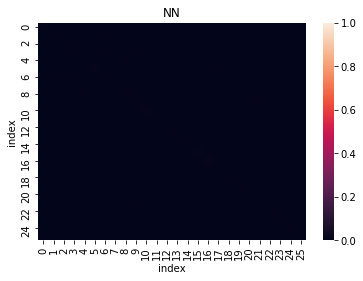

In [22]:
import matplotlib

title = ["1e", "atom", "minao", "NN"]
norm = None
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
for i, error in enumerate([dP_1e, dP_atom, dP_minao, dP_NN]):
    plt.figure()
    plt.title(title[i])
    matrix_error(error, vmin=0, vmax=1)
plt.show()   

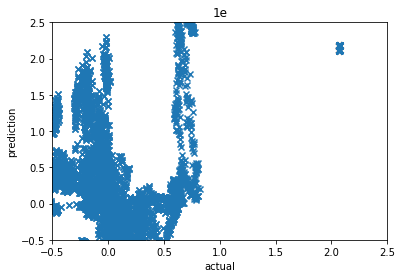

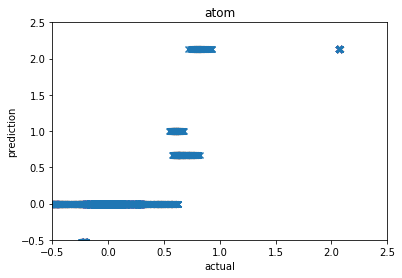

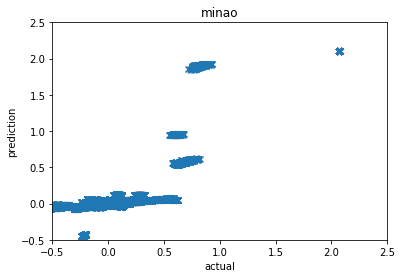

In [23]:
flatten = lambda x, y: list(x) + list(y)

def transform(x):
    return reduce(flatten, map(lambda y: y.flatten(), x))

expected = transform(P_expected)
labels = ["1e", "atom", "minao"]
for i, guess in enumerate(map(transform, [P_1e, P_atom, P_minao])):
    
    fig = plt.figure()
    plt.scatter(expected, guess, marker="x", label="test")
    plt.ylabel("prediction")
    plt.xlabel("actual")
    #plt.axis('equal')
    #plt.set_aspect('equal', 'box')
    lower, upper = -0.5, 2.5
    plt.axis([lower, upper, lower, upper])
    plt.title(labels[i])
    
plt.show()

## Check: was the calculation consistent?
Comapre newly calculated p vs P_test.

In [24]:
from pyscf.scf import hf

dim = 26

number_of_samples = len(S_test)

dP = np.zeros((dim, dim))

for i, (molecule, p) in enumerate(zip(molecules_test, P_test)):
    
    mol = molecule.get_pyscf_molecule()
    
    print("Calculating: " + str(i + 1) + "/" + str(number_of_samples))
    
    mf = hf.RHF(mol)
    mf.verbose = 1
    mf.kernel()
    
    p = p.reshape(dim, dim)
    
    dP += np.abs(p - mf.make_rdm1())

dP /= number_of_samples


Warn: Ipython shell catchs sys.args


Calculating: 1/50


Warn: Ipython shell catchs sys.args


Calculating: 2/50


Warn: Ipython shell catchs sys.args


Calculating: 3/50


Warn: Ipython shell catchs sys.args


Calculating: 4/50


Warn: Ipython shell catchs sys.args


Calculating: 5/50


Warn: Ipython shell catchs sys.args


Calculating: 6/50


Warn: Ipython shell catchs sys.args


Calculating: 7/50


Warn: Ipython shell catchs sys.args


Calculating: 8/50


Warn: Ipython shell catchs sys.args


Calculating: 9/50


Warn: Ipython shell catchs sys.args


Calculating: 10/50


Warn: Ipython shell catchs sys.args


Calculating: 11/50


Warn: Ipython shell catchs sys.args


Calculating: 12/50


Warn: Ipython shell catchs sys.args


Calculating: 13/50


Warn: Ipython shell catchs sys.args


Calculating: 14/50


Warn: Ipython shell catchs sys.args


Calculating: 15/50


Warn: Ipython shell catchs sys.args


Calculating: 16/50


Warn: Ipython shell catchs sys.args


Calculating: 17/50


Warn: Ipython shell catchs sys.args


Calculating: 18/50


Warn: Ipython shell catchs sys.args


Calculating: 19/50


Warn: Ipython shell catchs sys.args


Calculating: 20/50


Warn: Ipython shell catchs sys.args


Calculating: 21/50


Warn: Ipython shell catchs sys.args


Calculating: 22/50


Warn: Ipython shell catchs sys.args


Calculating: 23/50


Warn: Ipython shell catchs sys.args


Calculating: 24/50


Warn: Ipython shell catchs sys.args


Calculating: 25/50


Warn: Ipython shell catchs sys.args


Calculating: 26/50


Warn: Ipython shell catchs sys.args


Calculating: 27/50


Warn: Ipython shell catchs sys.args


Calculating: 28/50


Warn: Ipython shell catchs sys.args


Calculating: 29/50


Warn: Ipython shell catchs sys.args


Calculating: 30/50


Warn: Ipython shell catchs sys.args


Calculating: 31/50


Warn: Ipython shell catchs sys.args


Calculating: 32/50


Warn: Ipython shell catchs sys.args


Calculating: 33/50


Warn: Ipython shell catchs sys.args


Calculating: 34/50


Warn: Ipython shell catchs sys.args


Calculating: 35/50


Warn: Ipython shell catchs sys.args


Calculating: 36/50


Warn: Ipython shell catchs sys.args


Calculating: 37/50


Warn: Ipython shell catchs sys.args


Calculating: 38/50


Warn: Ipython shell catchs sys.args


Calculating: 39/50


Warn: Ipython shell catchs sys.args


Calculating: 40/50


Warn: Ipython shell catchs sys.args


Calculating: 41/50


Warn: Ipython shell catchs sys.args


Calculating: 42/50


Warn: Ipython shell catchs sys.args


Calculating: 43/50


Warn: Ipython shell catchs sys.args


Calculating: 44/50


Warn: Ipython shell catchs sys.args


Calculating: 45/50


Warn: Ipython shell catchs sys.args


Calculating: 46/50


Warn: Ipython shell catchs sys.args


Calculating: 47/50


Warn: Ipython shell catchs sys.args


Calculating: 48/50


Warn: Ipython shell catchs sys.args


Calculating: 49/50


Warn: Ipython shell catchs sys.args


Calculating: 50/50


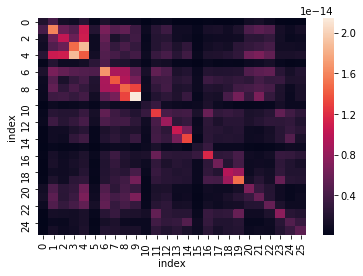

In [25]:
plt.figure()
matrix_error(dP)
plt.show()

## Physically motivated output activations
As we suspect the high number of iterations may be due to pysically to unphysical values. Thus we willtransform the output.

### Sigmoid
We will now try $\sigma(x) * 2$ to frce the values to be be between 1 and 2.

In [51]:
from SCFInitialGuess.nn.training import train_network
from SCFInitialGuess.nn.networks import EluTrNNN
import tensorflow as tf

class EluTrNNNSigmoid(EluTrNNN):
    def _output_activation(self, preactivation):
        """Sigmoidal output activation."""
        return tf.nn.sigmoid(preactivation) * 4 - 2

structure = [dim**2, 200, 100, dim**2]


#tf.reset_default_graph()
sigmoid_nn, sess_sigmoid = train_network(
    EluTrNNNSigmoid(structure),
    dataset,
    evaluation_period=100,
    mini_batch_size=20,
    convergence_threshold=1e-5,
    regularisation_parameter=1e-8
)

[-] 2018-03-19 18:42:47: Setting up the graph ...
[-] 2018-03-19 18:42:48: Starting network training ...
[ ] 2018-03-19 18:42:48: Validation cost: 5.79088E-02. Diff to prev.: 1.0E+10
[ ] 2018-03-19 18:42:48: Validation cost: 2.78867E-04. Diff to prev.: 5.8E-02
[ ] 2018-03-19 18:42:49: Validation cost: 1.53180E-04. Diff to prev.: 1.3E-04
[ ] 2018-03-19 18:42:50: Validation cost: 1.03149E-04. Diff to prev.: 5.0E-05
[ ] 2018-03-19 18:42:50: Validation cost: 7.78471E-05. Diff to prev.: 2.5E-05
[-] 2018-03-19 18:42:51: Convergence reached after 500 steps.
[-] 2018-03-19 18:42:51: Test error: 7.37029E-05


### McWheene Matrix Purification.
We will try the McWheene transformation 

$$P \rightarrow 3P^2 - 2P^3 $$

as output activation. This transformation is used to force idempotence upon the density matrix.

In [49]:
from SCFInitialGuess.nn.training import train_network
from SCFInitialGuess.nn.networks import EluTrNNN
import tensorflow as tf

class EluTrNNNMcWheene(EluTrNNN):
    def _output_activation(self, preactivation):
        """McWheene output transformation used as activaton."""
        
        reshaped_pre = tf.reshape(preactivation, shape=[-1, dim, dim])
    
        # if 3D tensor and dims match, tf will ignore first dim!
        squared = tf.matmul(
            reshaped_pre, 
            reshaped_pre
        )
        
        cubed = tf.matmul(
            squared,
            reshaped_pre
        )
        
        out = 3 * squared - 2 * cubed
        
        return tf.reshape(out, shape=[-1, dim**2])

structure = [dim**2, 200, 100, dim**2]

#tf.reset_default_graph()
mcwheene_nn, sess_mcwheeny = train_network(
    EluTrNNNMcWheene(structure),
    dataset,
    evaluation_period=100,
    mini_batch_size=20,
    convergence_threshold=1e-5,
    regularisation_parameter=1e-6
)

[-] 2018-03-19 18:39:22: Setting up the graph ...
[-] 2018-03-19 18:39:22: Starting network training ...
[ ] 2018-03-19 18:39:22: Validation cost: 5.76880E-02. Diff to prev.: 1.0E+10
[ ] 2018-03-19 18:39:23: Validation cost: 3.91985E-03. Diff to prev.: 5.4E-02
[ ] 2018-03-19 18:39:23: Validation cost: 1.52655E-03. Diff to prev.: 2.4E-03
[ ] 2018-03-19 18:39:24: Validation cost: 8.93187E-04. Diff to prev.: 6.3E-04
[ ] 2018-03-19 18:39:24: Validation cost: 7.07508E-04. Diff to prev.: 1.9E-04
[ ] 2018-03-19 18:39:25: Validation cost: 8.81944E-04. Diff to prev.: 1.7E-04
[ ] 2018-03-19 18:39:25: Validation cost: 5.19098E-04. Diff to prev.: 3.6E-04
[ ] 2018-03-19 18:39:26: Validation cost: 6.93689E-04. Diff to prev.: 1.7E-04
[ ] 2018-03-19 18:39:27: Validation cost: 5.92101E-04. Diff to prev.: 1.0E-04
[-] 2018-03-19 18:39:27: Convergence reached after 900 steps.
[-] 2018-03-19 18:39:27: Test error: 4.48026E-04


### Analysis


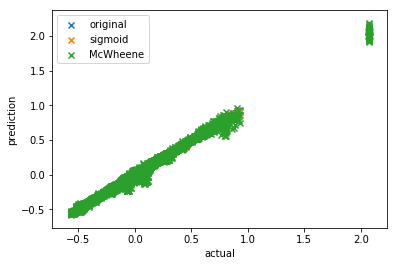

In [52]:
# test dataset

#original network
plt.scatter(
    np.array(dataset.testing[1]).flatten(),
    np.array(
        network.run(
            sess, 
            dataset.testing[0]
        )
    ).flatten(), 
    marker="x", 
    label="original"
)

# sigmoid
plt.scatter(
    np.array(dataset.testing[1]).flatten(),
    np.array(
        sigmoid_nn.run(
            sess_sigmoid, 
            dataset.testing[0]
        )
    ).flatten(), 
    marker="x", 
    label="sigmoid"
)

# mcwheene
plt.scatter(
    np.array(dataset.testing[1]).flatten(),
    np.array(
        mcwheene_nn.run(
            sess_mcwheeny, 
            dataset.testing[0]
        )
    ).flatten(), 
    marker="x", 
    label="McWheene"
)


plt.legend()

#lower, upper = -1, 2.5
#plt.axis([lower, upper, lower, upper])
plt.ylabel("prediction")
plt.xlabel("actual")
plt.show()

In [ ]:
from pyscf.scf import hf

dim = 26

iterations_output_activations = []
for i, molecule in enumerate(molecules_test):
    
    mol = molecule.get_pyscf_molecule()
    
    
    print("Calculating: " + str(i + 1) + "/" + str(len(molecules_test)))
    
    # nn guess
    s = hf.get_ovlp(mol).reshape(1, dim**2)
    s = Dataset.normalize(s, mean=dataset.x_mean, std=dataset.x_std)[0]
    P_Sigmoid = sigmoid_nn.run(sess, s).reshape(dim, dim).astype('float64')
    P_McWheene = mcwheene_nn.run(sess, s).reshape(dim, dim).astype('float64')
        
    iterations_molecule = []
    for guess in [P_Sigmoid, P_McWheene]:
        
        mf = hf.RHF(mol)
        mf.verbose = 1
        mf.kernel(dm0=guess)
        iterations_molecule.append(mf.iterations)
    
    iterations_output_activations.append(iterations_molecule)

iterations_output_activations = np.array(iterations_output_activations)

In [ ]:
#fig, axes = plt.subplots(2,2)

print(np.mean(iterations_output_activations,0))

bins = 20 # todo hier kann man auch ein array angeben

for i, name in enumerate(["Sigmoid", "McWheene"]):
    
    hist, bins = np.histogram(iterations_output_activations[:,i])
    center = (bins[:-1] + bins[1:]) / 2
    #axes[i].bar(center, hist, label=name)
    plt.bar(center, hist, label=name)
    
plt.legend()
plt.show()

In [ ]:
str(tf.get_default_graph())